In [77]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

*Goal: we have a signal embedded in **high frequency noise** and we want to filter out the noise.*

To make matters simpler for now, let's assume that the signal is constant:

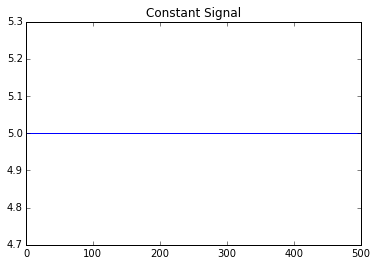

In [78]:
signal = np.ones(500)*5
plt.plot(signal)
plt.title('Constant Signal');

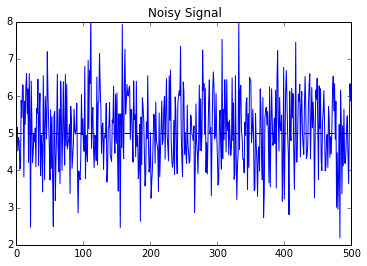

In [85]:
noisy_signal = signal + np.random.randn(500)
plt.plot(noisy_signal)
plt.plot(signal,'k--')
plt.ylim([2,8])
plt.title('Noisy Signal');

An intuitive way to recover the original signal is just to **average** the noisy signal. Let's see what that gives us.

In [86]:
avg_signal = np.mean(noisy_signal)
print("Estimated Original Signal: ",avg_signal)

Estimated Original Signal:  5.06212537856


We can think of the constant signal as a very low-frequency signal. In that sense, this average worked as a low-pass filter. 

Now lets consider a more interesting case where the signal is not constant, but still has a lower frequency than the noise. If we again average the whole signal, we will lose all the information contained in the signal. To avoid that issue, we instead use a moving average, giving us a **moving average filter**

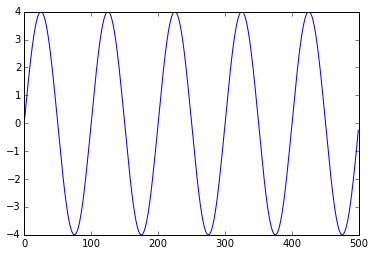

In [87]:
signal = 4*np.sin(np.arange(0,10*np.pi,10*np.pi/500))
plt.plot(signal);

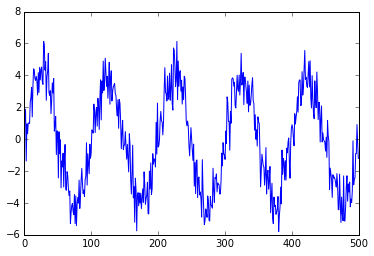

In [88]:
noisy_signal = signal + np.random.randn(len(signal))
plt.plot(noisy_signal);

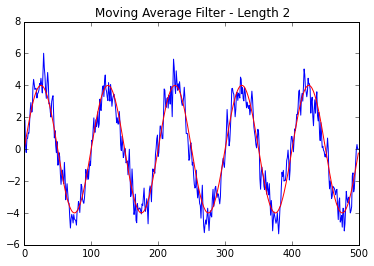

In [89]:
filtered_signal = np.zeros_like(noisy_signal)
num_avg = 2
for i in range(len(noisy_signal)-num_avg):
    for j in range(num_avg):
        filtered_signal[i] = filtered_signal[i] + noisy_signal[i+j]/num_avg
        

plt.plot(filtered_signal)
plt.plot(signal,'r')
plt.title("Moving Average Filter - Length "+str(num_avg));

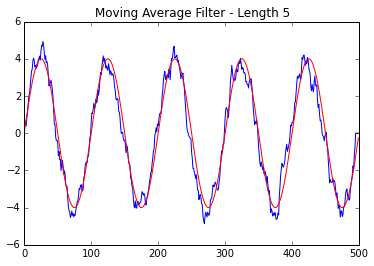

In [90]:
filtered_signal = np.zeros_like(noisy_signal)
num_avg = 5
for i in range(len(noisy_signal)-num_avg):
    for j in range(num_avg):
        filtered_signal[i] = filtered_signal[i] + noisy_signal[i+j]/num_avg
        

plt.plot(filtered_signal)
plt.plot(signal,'r')
plt.title("Moving Average Filter - Length "+str(num_avg));

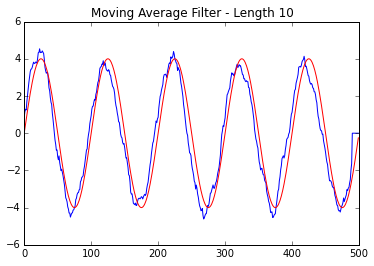

In [91]:
filtered_signal = np.zeros_like(noisy_signal)
num_avg = 10
for i in range(len(noisy_signal)-num_avg):
    for j in range(num_avg):
        filtered_signal[i] = filtered_signal[i] + noisy_signal[i+j]/num_avg
        

plt.plot(filtered_signal)
plt.plot(signal,'r');
plt.title("Moving Average Filter - Length "+str(num_avg));

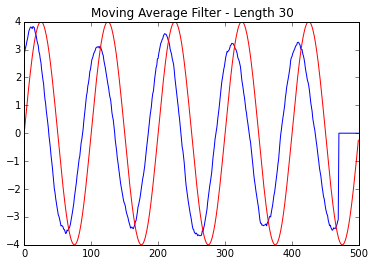

In [93]:
filtered_signal = np.zeros_like(noisy_signal)
num_avg = 30
for i in range(len(noisy_signal)-num_avg):
    for j in range(num_avg):
        filtered_signal[i] = filtered_signal[i] + noisy_signal[i+j]/num_avg
        

plt.plot(filtered_signal)
plt.plot(signal,'r')
plt.title("Moving Average Filter - Length "+str(num_avg));